In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std = 0.6)

#print(X)
#print(Y)

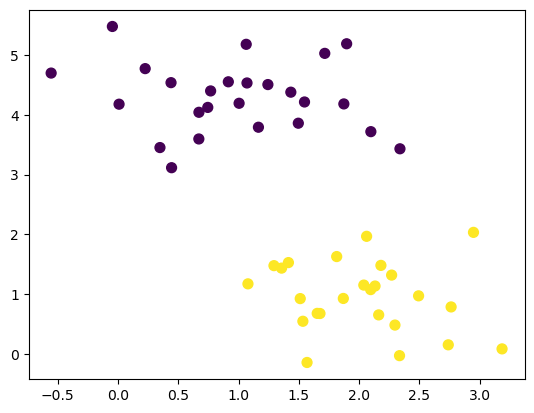

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50)

In [5]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)

model.fit(X, Y)

# Regularization Parameter (C): The parameter C controls the trade-off between maximizing the margin and minimizing the 
# classification error. It acts as a regularization parameter. A lower value of C encourages the model to maximize the 
# margin and allows some misclassification (high regularization), while a higher value of C focuses more on minimizing the 
# classification error (low regularization).

SVC(C=1, kernel='linear')

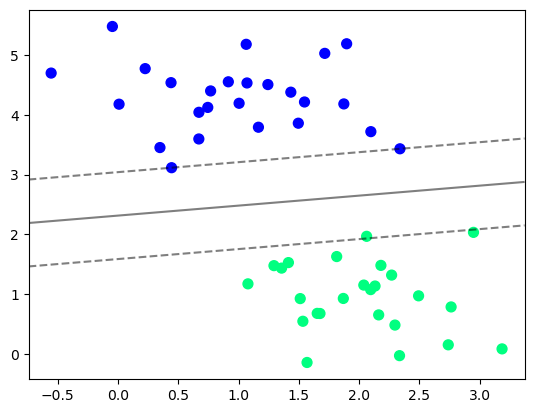

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='winter')
plot_svc_decision_function(model);

In [7]:
# You may try C = 0.1 and more, the paramter controls the tradeoff between classification error and margin error

# Kernel Functions

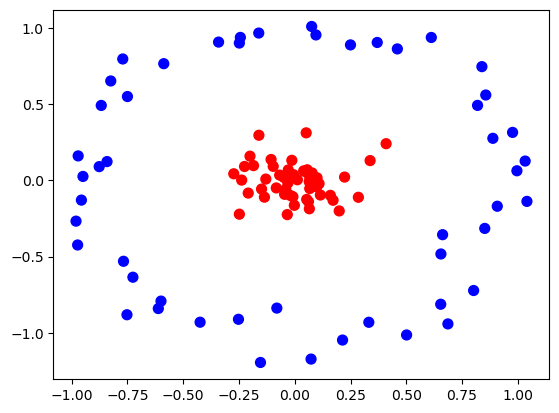

In [8]:
from sklearn.datasets import make_circles
X, Y = make_circles(100, factor=0.1, noise=0.1)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='bwr')

# factor=0.1: This parameter controls the distance between the two concentric circles. 
# noise=0.1: This parameter specifies the standard deviation of Gaussian noise added to the data.

In [9]:
print(X)
print(Y)

[[ 0.97661162  0.31524745]
 [-0.18483612  0.09722048]
 [-0.20852731 -0.08291325]
 [ 1.03304363  0.12721039]
 [ 0.46001907  0.86301424]
 [ 0.07794836  0.04906112]
 [-0.01307523  0.13197261]
 [ 0.05363046 -0.12451284]
 [ 0.9960796   0.06341126]
 [ 0.15975035 -0.09788244]
 [ 0.33212945 -0.93070594]
 [ 0.21432613 -1.04730305]
 [ 0.24993427  0.88933179]
 [ 0.90805519 -0.16931341]
 [-0.25229715 -0.91107657]
 [-0.08023651 -0.8375999 ]
 [-0.76771172 -0.53043047]
 [ 0.61225891  0.9380449 ]
 [-0.61164432 -0.84053109]
 [ 0.05588416  0.06975762]
 [-0.16133631  0.96705561]
 [ 0.06541141 -0.18592219]
 [ 0.19939488 -0.20006605]
 [ 0.8390903   0.74664679]
 [ 0.07314658 -1.17213678]
 [ 0.50143109 -1.01391685]
 [-0.06758967  0.03508908]
 [-0.20062215  0.1591674 ]
 [-0.94944848  0.02622744]
 [ 0.11493675 -0.09570325]
 [-0.34152251  0.90774988]
 [-0.84152235  0.12369783]
 [ 0.04002694  0.06260743]
 [ 0.2234739   0.02212322]
 [ 0.81961815  0.49242341]
 [-0.24380494  0.93842424]
 [-0.02903462  0.06890921]
 

In [10]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

In [11]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1)
model.fit(Xtrain, Ytrain)

SVC(C=1, kernel='linear')

In [12]:
model.score(Xtest, Ytest)

0.55

In [13]:
Y_pred = model.predict(Xtest)

from sklearn.metrics import accuracy_score
print(accuracy_score(Ytest, Y_pred))

0.55


C:\Users\HP\AppData\Local\Temp\ipykernel_14516\3216496941.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


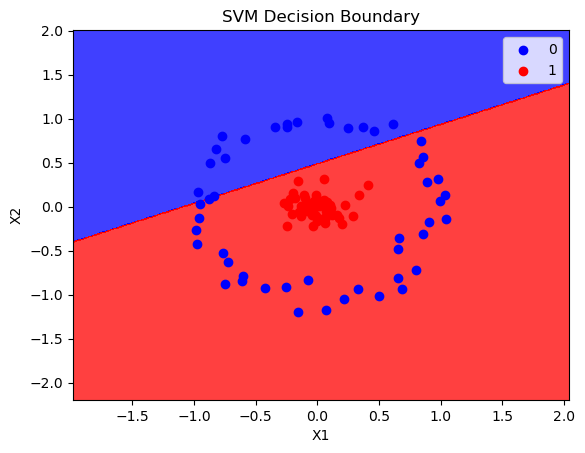

In [16]:
from matplotlib.colors import ListedColormap

zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

plot_decision_boundary(X, Y, model)

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

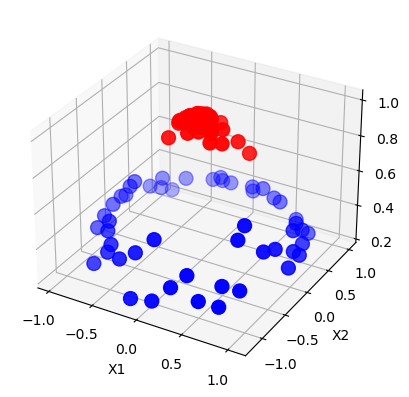

In [18]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

plot_3d_plot(X,Y)

In [20]:
model = SVC(kernel='rbf')
model.fit(Xtrain, Ytrain)

model.score(Xtest, Ytest)

1.0

C:\Users\HP\AppData\Local\Temp\ipykernel_14516\3216496941.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


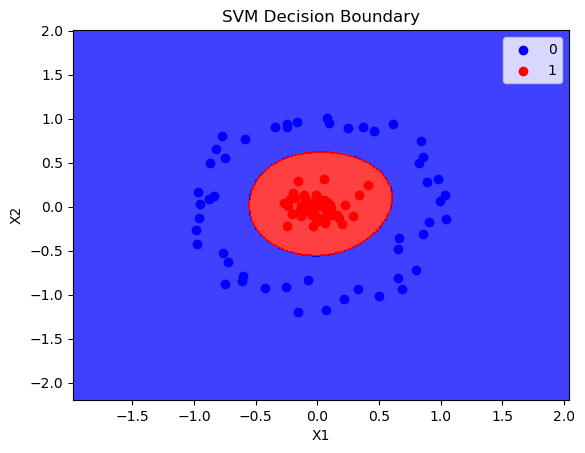

In [21]:
plot_decision_boundary(X, Y, model)

In [22]:
model = SVC(kernel='poly', degree = 2)
model.fit(Xtrain, Ytrain)

model.score(Xtest, Ytest)

1.0

C:\Users\HP\AppData\Local\Temp\ipykernel_14516\3216496941.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


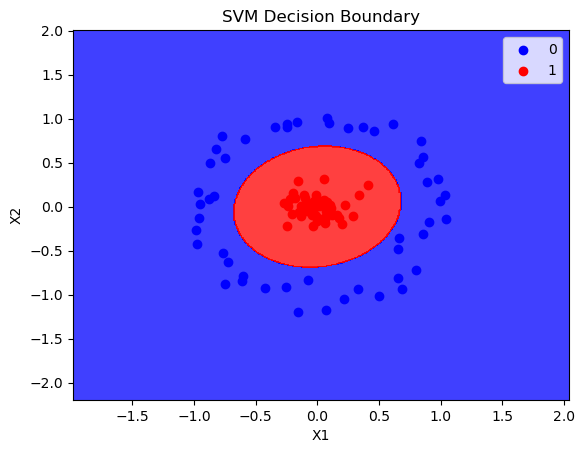

In [23]:
plot_decision_boundary(X, Y, model)

In [24]:
model = SVC(kernel='poly', degree = 3)
model.fit(Xtrain, Ytrain)

model.score(Xtest, Ytest)

0.5

C:\Users\HP\AppData\Local\Temp\ipykernel_14516\3216496941.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


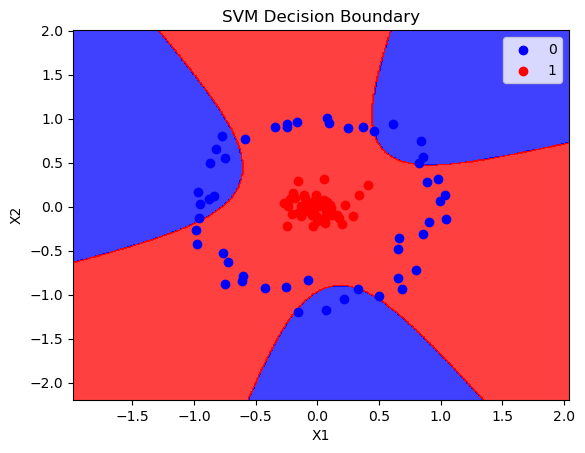

In [25]:
plot_decision_boundary(X, Y, model)